<a href="https://colab.research.google.com/github/milu234/Client-Projects/blob/master/Copy_of_gait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  #Upload your file from your Computer then shift + Enter(Execute and next shell)
uploaded = files.upload()

Saving Data_set.csv to Data_set.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np                #Import all the librarise

import sensormotion as sm

In [ ]:
pip install sensormotion        #install sensormotion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sensormotion as sm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)   #import librarries
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Data_set.csv']))  #the csv uploaded converted to dataframe (check the file name properly)

In [ ]:
df.tail(5) #chck the values

,entry_id,x,y,z,temp,gx,gy,gz,status
25,26,73,81,29,40,53,54,5,field1 is less than field2
26,27,76,63,32,27,61,22,84,field1 is greater than field2
27,28,79,71,8,49,89,36,80,field1 is greater than field2
28,29,82,14,5,39,25,21,34,field1 is greater than field2
29,30,85,15,86,1,94,62,62,field1 is greater than field2


In [ ]:
df.corr()  #check the values

,entry_id,x,y,z,temp,gx,gy,gz
entry_id,1.000000,0.999869,0.088364,-0.231212,-0.219029,0.127156,-0.014975,0.111882
x,0.999869,1.000000,0.086121,-0.230218,-0.215224,0.124725,-0.019094,0.115757
y,0.088364,0.086121,1.000000,0.017339,-0.160211,0.185199,-0.048424,-0.230937
z,-0.231212,-0.230218,0.017339,1.000000,0.002891,-0.052110,0.053718,0.038228
temp,-0.219029,-0.215224,-0.160211,0.002891,1.000000,0.039883,-0.030061,-0.168228
gx,0.127156,0.124725,0.185199,-0.052110,0.039883,1.000000,0.013210,-0.047372
gy,-0.014975,-0.019094,-0.048424,0.053718,-0.030061,0.013210,1.000000,-0.165970
gz,0.111882,0.115757,-0.230937,0.038228,-0.168228,-0.047372,-0.165970,1.000000


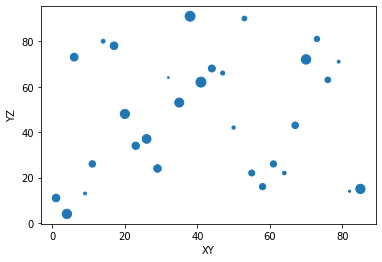

In [ ]:
plt.scatter(df.x, df.y, df.z)
plt.xlabel("XY")
plt.ylabel("YZ")              #Plot the graph

plt.show()

In [ ]:
sampling_rate = 3  # number of samples per second
seconds = 10
time = np.arange(0, seconds*sampling_rate) * 10  # times in milliseconds
time

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290])

In [ ]:
np.random.seed(123)

In [ ]:
x = df.x
y = df.y     #accessing the data set
z = df.z

In [ ]:
x = x.to_numpy()
y = y.to_numpy()
z = z.to_numpy()    #convert into array

In [ ]:
x = x/100
y = y/100
z = z/100

z.shape[0]


30

In [ ]:
x = (x-min(x))/(max(x)-min(x))
y = (y-min(y))/(max(y)-min(y))
z = (z-min(z))/(max(z)-min(z))

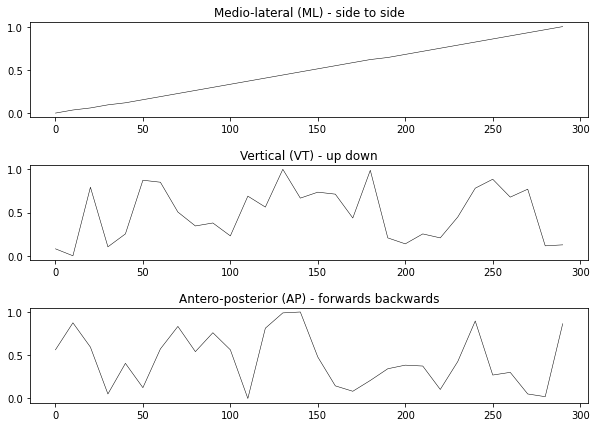

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

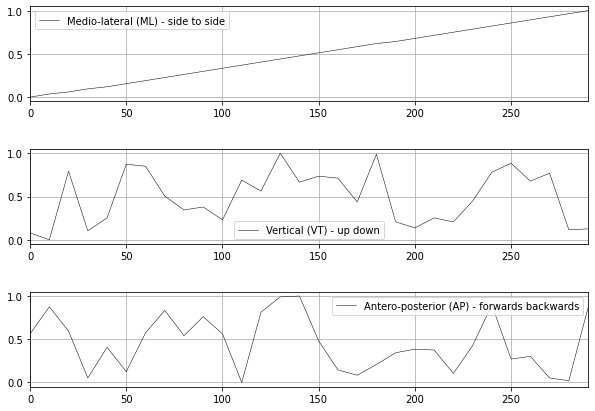

In [ ]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

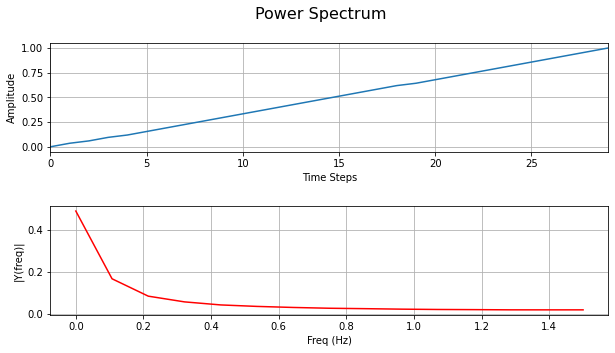

In [ ]:
_ = sm.signal.fft(x, sampling_rate, plot=True)

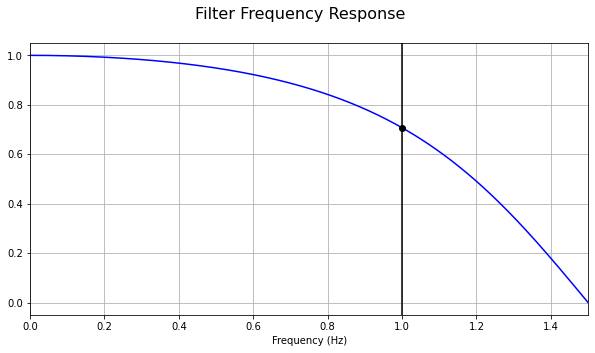

In [ ]:

sm.plot.plot_filter_response(1, sampling_rate, 'low', filter_order=1)

In [ ]:
# Build the filter
b, a = sm.signal.build_filter(1, sampling_rate, 'low', filter_order=4)

# Filter signals
x_f = sm.signal.filter_signal(b, a, x)  # ML medio-lateral
y_f = sm.signal.filter_signal(b, a, y)  # VT vertical
z_f = sm.signal.filter_signal(b, a, z)  # AP antero-posterior

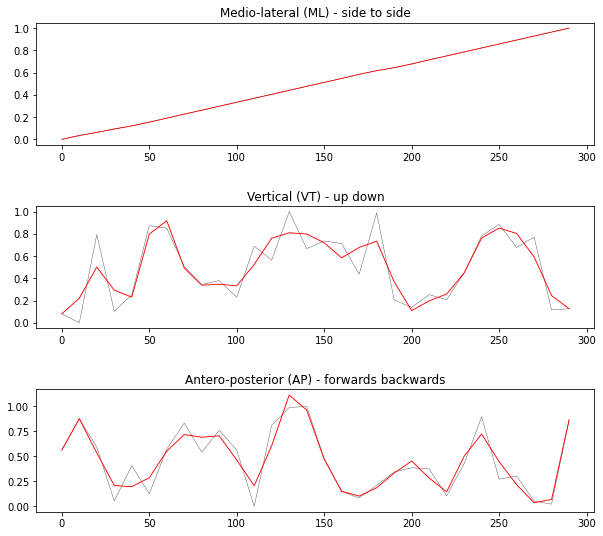

In [ ]:
# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.3, color='k')
ax[0].plot(time, x_f, linewidth=0.8, color='r')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.3, color='k')
ax[1].plot(time, y_f, linewidth=0.9, color='r')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.3, color='k')
ax[2].plot(time, z_f, linewidth=0.9, color='r')

fig.subplots_adjust(hspace=.5)

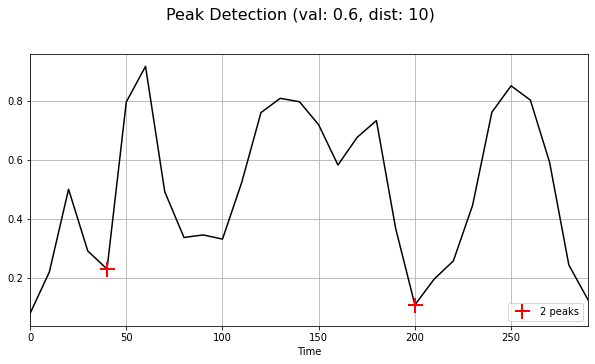

In [ ]:

peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=True)

In [ ]:
step_count = sm.gait.step_count(peak_times)
cadence = sm.gait.cadence(time, peak_times)
step_time, step_time_sd, step_time_cov = sm.gait.step_time(peak_times)

print(' - Number of steps: {}'.format(step_count))
print(' - Cadence: {:.2f} steps/min'.format(cadence))
print(' - Mean step time: {:.2f}ms'.format(step_time))
print(' - Step time variability (standard deviation): {:.2f}'.format(step_time_sd))
print(' - Step time variability (coefficient of variation): {:.2f}'.format(step_time_cov))

 - Number of steps: 2
 - Cadence: 413.79 steps/min
 - Mean step time: 160.00ms
 - Step time variability (standard deviation): 0.00
 - Step time variability (coefficient of variation): 0.00


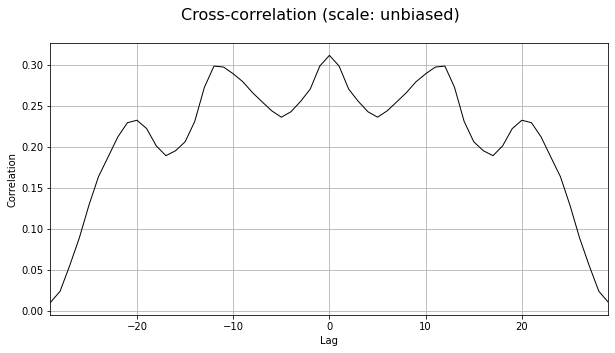

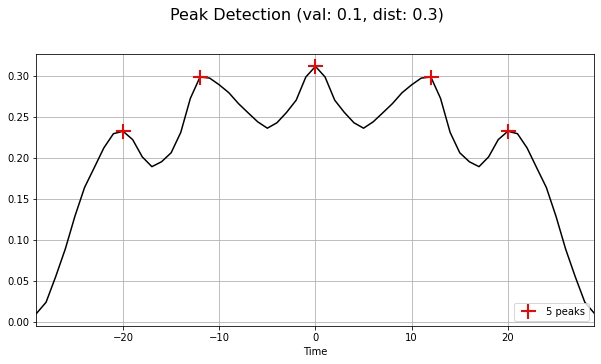

 - Step regularity: 0.9580
 - Stride regularity: 0.7460
 - Step symmetry: 0.7786


In [ ]:
ac, ac_lags = sm.signal.xcorr(y_f, y_f, scale='unbiased', plot=True)

ac_peak_times, ac_peak_values = sm.peak.find_peaks(ac_lags, ac, peak_type='peak', min_val=0.1, min_dist=0.3, plot=True)
ac_peak_values

step_reg, stride_reg = sm.gait.step_regularity(ac_peak_values)
step_sym = sm.gait.step_symmetry(ac_peak_values)

print(' - Step regularity: {:.4f}'.format(step_reg))
print(' - Stride regularity: {:.4f}'.format(stride_reg))
print(' - Step symmetry: {:.4f}'.format(step_sym))


In [ ]:

# sampling_rate = 100  # number of samples per second
# seconds = 600
# time = np.arange(0, 30) * 10  # times in milliseconds

# np.random.seed(123)

# x = 2*np.sin(time/30) + np.random.normal(0.5, 0.4, len(time))  # ML medio-lateral
# y = 4*np.sin(time/80) + np.random.normal(1.0, 0.5, len(time))  # VT vertical
# z = 3*np.sin(time/90) + np.random.normal(0.0, 0.4, len(time))  # AP antero-posterior

# Adjust amount of movement at various timepoints
signals = [x, y, z]

for s in signals:
    s[20000:40000] = s[20000:40000] * 10
    s[40000:] = s[40000:] * 50

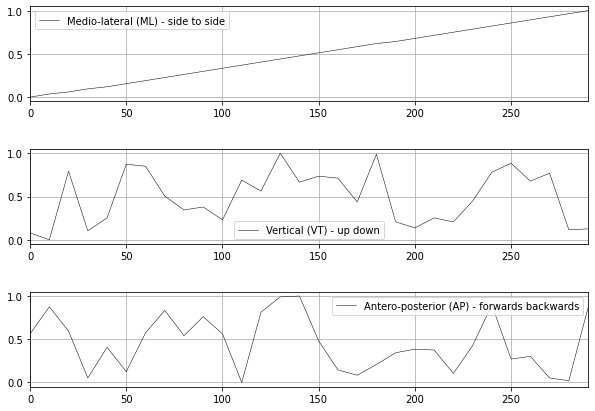

In [ ]:

sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

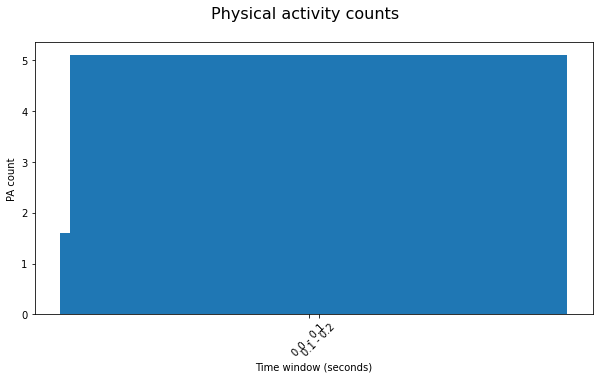

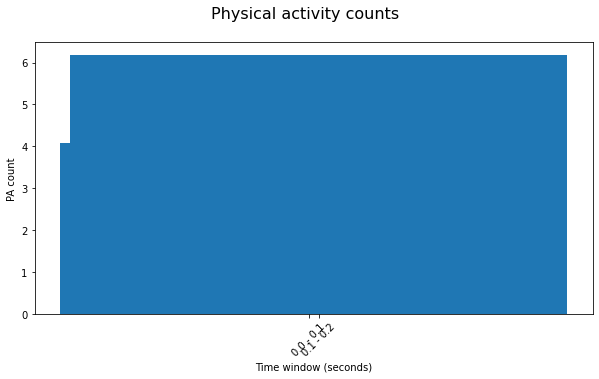

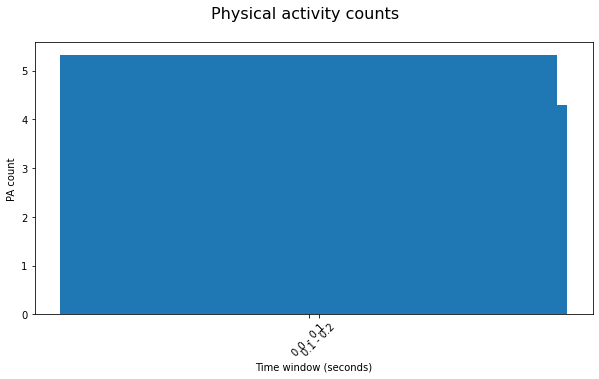

In [ ]:
x_counts = sm.pa.convert_counts(x*100, time, time_scale='ms', epoch=0.1, rectify='full', integrate='simpson', plot=True)
y_counts = sm.pa.convert_counts(y*100, time, time_scale='ms', epoch=0.1, rectify='full', integrate='simpson', plot=True)
z_counts = sm.pa.convert_counts(z*100, time, time_scale='ms', epoch=0.1, rectify='full', integrate='simpson', plot=True)

In [ ]:
vm = sm.signal.vector_magnitude(x_counts, y_counts, z_counts)

Cut-point set: butte_preschoolers (axis count: 3)...
sedentary: -inf to 819
light: 820 to 3907
moderate: 3908 to 6111
vigorous: 6112 to inf


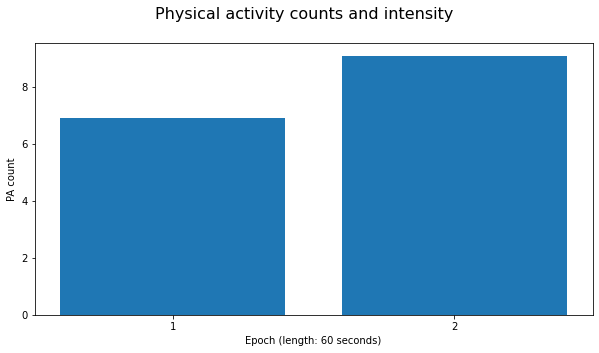

In [ ]:
categories, time_spent = sm.pa.cut_points(vm, set_name='butte_preschoolers', n_axis=3, plot=True)

In [ ]:

print('Categories: {}\n'.format(categories))
print('Time spent:')
print(time_spent)

Categories: ['sedentary', 'sedentary']

Time spent:
[['sedentary']
 ['2']]
